# **DAT305 Project**

## *By Sakura Attanayake*

## PhD student

## UiS

# **Task 5: BBC News Article Classification**

**Goal:** This project involves classifying BBC news articles into one of five categories (business, sports, politics, technology, or entertainment). You will be expected to clean and preprocess the data, perform exploratory analysis, and build a machine learning or deep learning model for text classification making it a multiclass classification problem.

Students are encouraged to explore model optimization and fine-tuning techniques using frameworks like Scikit-learn, TensorFlow, Keras, Transformer or PyTorch.

**Dataset:** The BBC News Dataset contains 2,225 articles from the BBC news website corresponding to stories in five topical areas from 2004-2005. The articles are categorized into five topics: business, sports, politics, technology, and entertainment.

The dataset contained two files named; BBC News Test.CSV and BBC News Train.CSV

The python programming for the given task is given below:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Step 1: Data Preprocessing**
1. Read Data

*   Load the dataset using library pandas
*   Separate the training (BBC News Train) and test datasets (BBC News Test).





2. Data Cleaning

*   Convert all text to lowercase.
*  Remove punctuation, special characters, and extra whitespaces.
*   Tokenize the text into individual words.
*   Remove stop words using NLTK.
*   Apply lemmatization.



3. Categorical Overview

*   Analyze and count the number of articles in each category (business,sports, politics, technology, entertainment).


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet') # Download the wordnet dataset

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Load data
train_data = pd.read_csv('/content/BBC News Train.csv')
test_data = pd.read_csv('/content/BBC News Test.csv')

# Combine train and test
data = pd.concat([train_data, test_data], ignore_index=True)

# Check the column names of the DataFrames
print(train_data.columns)
print(test_data.columns)

# Clean text function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Change the following line to reflect the actual column name
data['cleaned_text'] = data['Text'].apply(clean_text)  # Now clean_text is defined before being called

# Remove stopwords and lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

data['processed_text'] = data['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Index(['ArticleId', 'Text', 'Category'], dtype='object')
Index(['ArticleId', 'Text'], dtype='object')


In [ ]:
# View the first few rows of the cleaned dataset
print("Cleaned Dataset (Train):")
print(train_data.head())

print("\nCleaned Dataset (Test):")
print(test_data.head())


Cleaned Dataset (Train):
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

Cleaned Dataset (Test):
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...


In [ ]:
# View dataset information (columns, data types, non-null values)
print("Train Dataset Info:")
print(train_data.info())

print("\nTest Dataset Info:")
print(test_data.info())

# View basic statistics for numerical columns
print("\nTrain Dataset Description:")
print(train_data.describe())

print("\nTest Dataset Description:")
print(test_data.describe())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None

Train Dataset Description:
         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000

Test Dataset Description:
         ArticleId
count   735.000000
mean   1099.424490
std 

In [ ]:
# Check the column names for category labels
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)

category_column = 'Category'

# Check unique categories in train, test, and combined data
if category_column in train_data.columns:
    num_train_categories = train_data[category_column].nunique()

    print(f"Number of categories in Train Data: {num_train_categories}")

    # Display the unique category names
    print("\nUnique categories in Train Data:", train_data[category_column].unique())

else:
    print(f"Column '{category_column}' not found in train or test datasets. Check column names.")


Train Data Columns: Index(['ArticleId', 'Text', 'Category'], dtype='object')
Test Data Columns: Index(['ArticleId', 'Text'], dtype='object')
Number of categories in Train Data: 5

Unique categories in Train Data: ['business' 'tech' 'politics' 'sport' 'entertainment']


In [ ]:
# Get counts of each category in train, test, and combined data
if category_column in train_data.columns:
    train_category_counts = train_data[category_column].value_counts()


    # Print counts
    print("Category counts in Train Data:\n", train_category_counts)

else:
    print(f"Column '{category_column}' not found in train or test datasets. Check column names.")


Category counts in Train Data:
 Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


### **Step 2: Exploratory Data Analysis (EDA)**

1. Visualize Data


    Using matplotlib to create
*  Bar plots and pie charts for the category distribution

<ipython-input-8-315cce814372>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


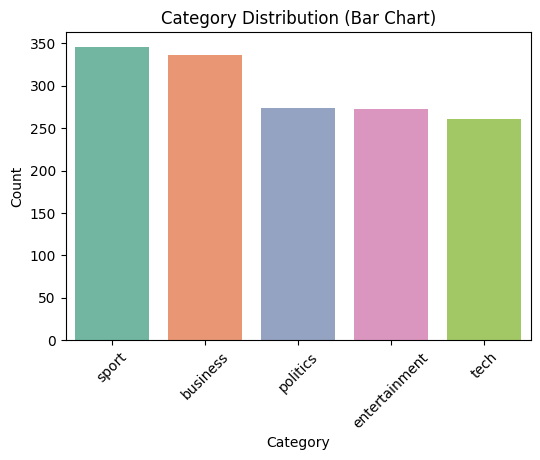

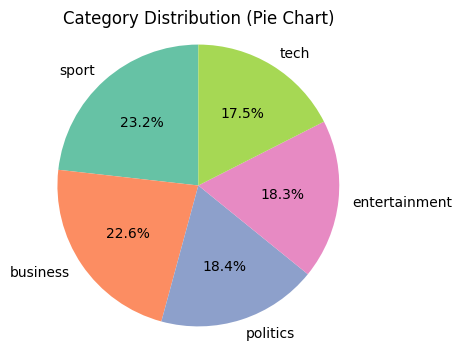

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get category counts
category_counts = data['Category'].value_counts()

# Bar Chart with Different Colors
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Category Distribution (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie Chart with Different Colors
plt.figure(figsize=(4, 4))
colors = sns.color_palette('Set2', len(category_counts))  # Choosing a color palette
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Category Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


### **Step 3: Feature Extraction**

Convert Text to Features


TF-IDF: Transform text into weighted frequency features using TfidfVectorizer.


Preprocess text into numerical formats using Scikit-learn framework

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Recreate X and y after handling NaN values:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text']).toarray() # Recalculate X
y = data['Category']  # Recalculate y

# Initialize and apply TF-IDF to training and test data:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Apply TF-IDF to training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])

# Apply TF-IDF to test data
X_test_tfidf = tfidf_vectorizer.transform(test_data['Text'])

# Convert TF-IDF features to a pandas DataFrame
tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the training dataset
print("The first few rows of the training dataset:\n", tfidf_train_df.head())

# Display the first few rows of the test dataset
print("The first few rows of the test dataset:\n", tfidf_test_df.head())

The first few rows of the training dataset:
         000  000 jobs  000 new  000 people  000 year  000m   05        10  \
0  0.000000       0.0      0.0    0.000000       0.0   0.0  0.0  0.000000   
1  0.000000       0.0      0.0    0.000000       0.0   0.0  0.0  0.041989   
2  0.026276       0.0      0.0    0.046647       0.0   0.0  0.0  0.000000   
3  0.019716       0.0      0.0    0.000000       0.0   0.0  0.0  0.000000   
4  0.000000       0.0      0.0    0.000000       0.0   0.0  0.0  0.037467   

   10 000  10 000m  ...  young people   younger  youngsters  yuan  yugansk  \
0     0.0      0.0  ...           0.0  0.000000    0.000000   0.0      0.0   
1     0.0      0.0  ...           0.0  0.000000    0.000000   0.0      0.0   
2     0.0      0.0  ...           0.0  0.000000    0.000000   0.0      0.0   
3     0.0      0.0  ...           0.0  0.079454    0.045521   0.0      0.0   
4     0.0      0.0  ...           0.0  0.000000    0.000000   0.0      0.0   

   yuganskneftegas  yuk

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

data = data.dropna(subset=['Category'])

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['Category']

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

### **Step 4 & Step 5: Model Selection**

Traditional Machine Learning Models

(1) using Logistic Regression with evaluation metrics


Classification Report:
               precision    recall  f1-score   support

     business       0.92      0.98      0.95       101
entertainment       0.99      1.00      0.99        82
     politics       0.99      0.90      0.94        82
        sport       0.99      1.00      1.00       104
         tech       0.96      0.94      0.95        78

     accuracy                           0.97       447
    macro avg       0.97      0.96      0.97       447
 weighted avg       0.97      0.97      0.97       447

Confusion Matrix:


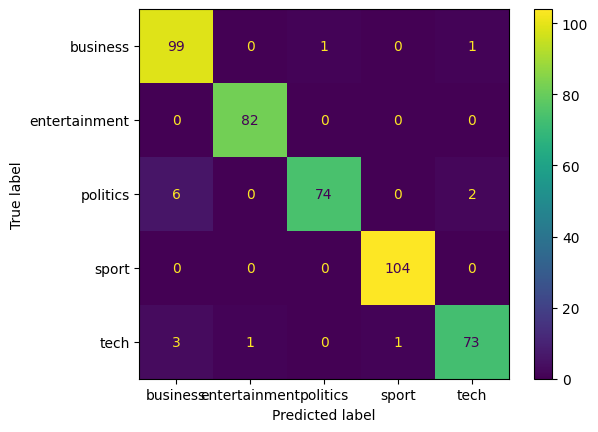

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Traditional Machine Learning Models

(2) using SVM with evaluation metrics

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.99      0.98       101
entertainment       0.99      1.00      0.99        82
     politics       1.00      0.95      0.97        82
        sport       1.00      1.00      1.00       104
         tech       0.96      0.96      0.96        78

     accuracy                           0.98       447
    macro avg       0.98      0.98      0.98       447
 weighted avg       0.98      0.98      0.98       447

Confusion Matrix:


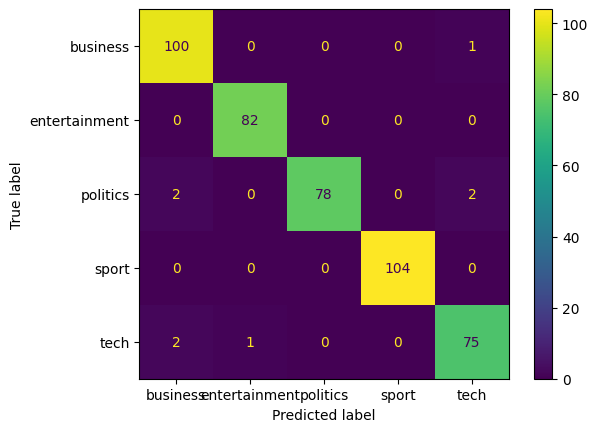

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


Deep Learning models

(3) Using RNN with evaluation metrics

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform both training and testing labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now apply to_categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [ ]:
# Define parameters
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum sequence length for padding

rnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.2194 - loss: 1.6361 - val_accuracy: 0.1745 - val_loss: 1.6497
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 0.2199 - loss: 1.6798 - val_accuracy: 0.2260 - val_loss: 1.6286
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.1944 - loss: 1.6997 - val_accuracy: 0.1834 - val_loss: 1.6591
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.1778 - loss: 1.7080 - val_accuracy: 0.2327 - val_loss: 1.6156
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 204s 6s/step - accuracy: 0.2188 - loss: 1.6693 - val_accuracy: 0.1834 - val_loss: 1.6495


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_labels = np.argmax(y_test, axis=1)

loss, accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}\n")


Test Accuracy: 0.1834



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Get predicted labels from model predictions
y_pred_probs = rnn_model.predict(X_test)  # Assuming rnn_model is the trained model
y_pred = np.argmax(y_pred_probs, axis=1) # Get class labels with highest probability

# Convert y_test to class labels using argmax
y_test_labels = np.argmax(y_test, axis=1)

# Now, calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
print(f"Precision: {precision},\n Recall: {recall},\n F1-Score: {f1}\n")


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step
Precision: 0.03365213779159097,
 Recall: 0.18344519015659955,
 F1-Score: 0.05687147672151669



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Deep Learning models

(4) Using CNN with evaluation metrics

In [ ]:
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1851 - loss: 1.6155 - val_accuracy: 0.2260 - val_loss: 1.6037
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2323 - loss: 1.6092 - val_accuracy: 0.2327 - val_loss: 1.6041
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.2451 - loss: 1.6062 - val_accuracy: 0.2327 - val_loss: 1.6045
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2116 - loss: 1.6048 - val_accuracy: 0.2327 - val_loss: 1.6036
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2184 - loss: 1.6042 - val_accuracy: 0.2327 - val_loss: 1.6031


In [ ]:
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.2327


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Get predicted labels from model predictions
y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get class labels with highest probability

# Convert y_test to class labels using argmax
y_test_labels = np.argmax(y_test, axis=1)

# Now, calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
print(f"Precision: {precision},\n Recall: {recall},\n F1-Score: {f1}\n")


14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 833ms/step
Precision: 0.05413169576945983,
 Recall: 0.232662192393736,
 F1-Score: 0.08782892199255372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(5) Using Transformers with evaluation metrics

In [11]:
from transformers import TFBertForSequenceClassification, BertTokenizer
import tensorflow as tf
import pandas as pd

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y.unique()))

def tokenize_data(texts, labels, tokenizer, max_length=128):
    """
    Tokenizes the input texts using the provided tokenizer.

    Args:
        texts: A list of strings representing the input texts.
        labels: The corresponding labels for the texts.
        tokenizer: The tokenizer object to use for tokenization.
        max_length: The maximum sequence length for padding/truncation.

    Returns:
        A tuple containing the tokenized input IDs, attention masks, and labels.
    """
    inputs = tokenizer(texts.tolist(), max_length=max_length, truncation=True, padding=True, return_tensors='tf')  # Convert texts to a list for the tokenizer
    return inputs['input_ids'], inputs['attention_mask'], labels

# Assuming 'data' is your original DataFrame containing the 'processed_text' column
train_inputs, train_masks, train_labels = tokenize_data(data.loc[y_train.index, 'processed_text'], y_train, tokenizer)  # Use original text data for tokenization
test_inputs, test_masks, test_labels = tokenize_data(data.loc[y_test.index, 'processed_text'], y_test, tokenizer)  # Use original text data for tokenization

# Create a label mapping (string labels to integers)
label_mapping = {label: i for i, label in enumerate(y.unique())}

# Convert string labels to numerical labels
train_labels_encoded = train_labels.map(label_mapping)
test_labels_encoded = test_labels.map(label_mapping)


optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

bert_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = bert_model.fit(
    [train_inputs, train_masks], train_labels_encoded,  # Use encoded labels for training
    validation_data=([test_inputs, test_masks], test_labels_encoded),  # Use encoded labels for validation
    epochs=5,
    batch_size=32
)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
33/33 [==============================] - 1666s 49s/step - loss: 1.0124 - accuracy: 0.7210 - val_loss: 0.3649 - val_accuracy: 0.9463
Epoch 2/5
33/33 [==============================] - 1607s 49s/step - loss: 0.2074 - accuracy: 0.9751 - val_loss: 0.1524 - val_accuracy: 0.9642
Epoch 3/5
33/33 [==============================] - 1603s 49s/step - loss: 0.0761 - accuracy: 0.9914 - val_loss: 0.1364 - val_accuracy: 0.9664
Epoch 4/5
33/33 [==============================] - 1612s 49s/step - loss: 0.0431 - accuracy: 0.9962 - val_loss: 0.0932 - val_accuracy: 0.9709
Epoch 5/5
33/33 [==============================] - 1620s 49s/step - loss: 0.0229 - accuracy: 0.9990 - val_loss: 0.1402 - val_accuracy: 0.9642


### **Step 6. Model Training:**

o Train the model on the training split and validate on the development test split.

o Plot the training and validation accuracy/loss curves over the training epochs.

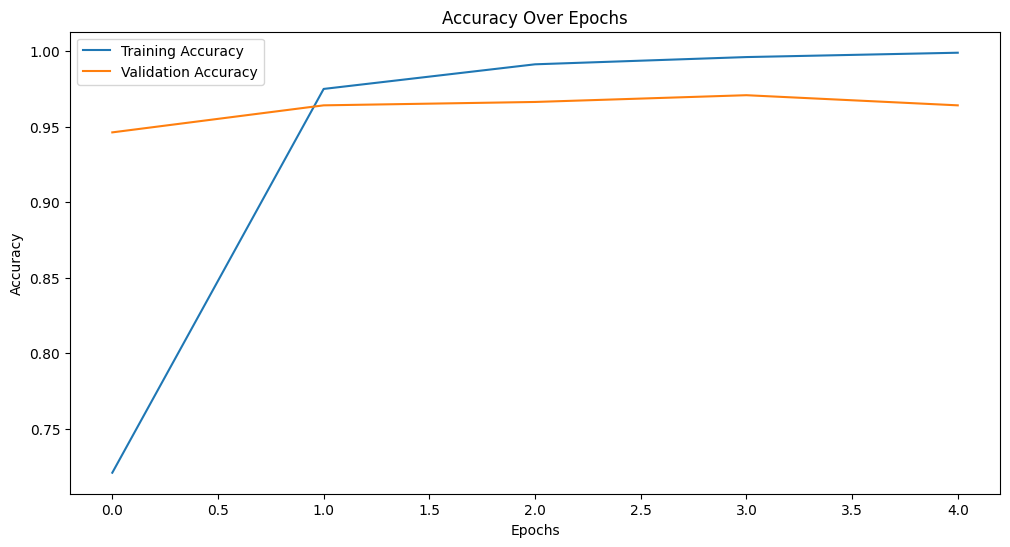

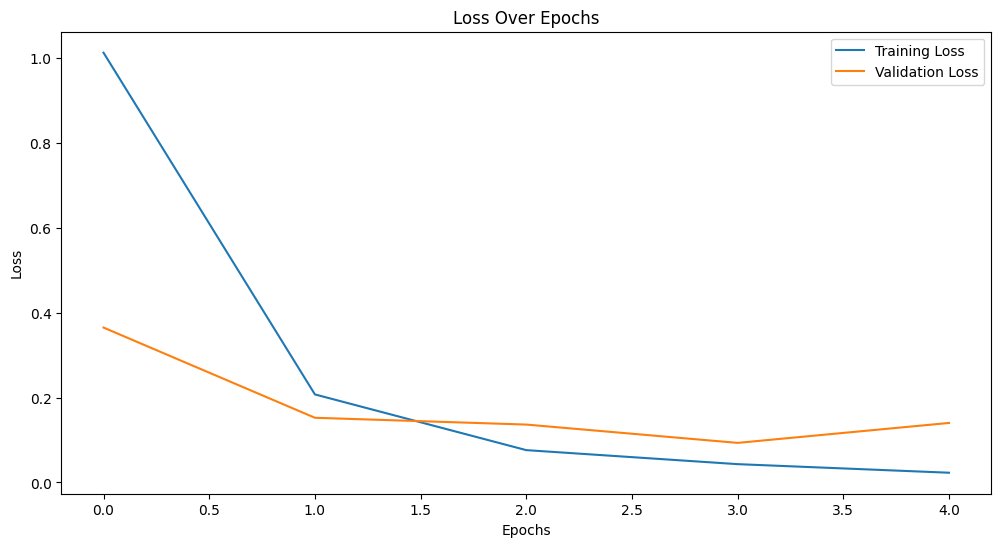

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
